In [66]:
import json
import pandas as pd
import datetime
from functools import partial

import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 100)

## Data loading

In [39]:
df = pd.read_json('../data/merged_matches_with_chat.json')

<AxesSubplot: >

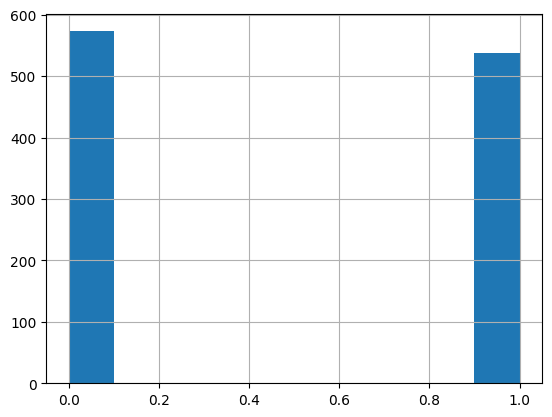

In [40]:
df.radiant_win.astype(int).hist()

## Data anaylysis

## Chat analysis

slot: "Which slot the player is in. 0-127 are Radiant, 128-255 are Dire"

In [56]:
i = 34
one_chat = df.chat.values[i]

In [57]:
pd.Series.value_counts([c['type'] for c in one_chat])

chatwheel    37
chat          6
dtype: int64

In [58]:
[f"{c['key']} : {c['time'] // 60}min" \
 for c in one_chat if c['type'] == 'chat']

['тб хуево поддерживал дахака что они 2-0 вьебали : -1min',
 'все из-за него  : -1min',
 '+ : -1min',
 'петух слабое звено : 23min',
 'кто отожмет тот гей : 36min',
 'я семён : 36min']

In [62]:
[c['key'] for c in one_chat \
 if c['type'] == 'chat' and c['player_slot'] <= 127]

['тб хуево поддерживал дахака что они 2-0 вьебали',
 'петух слабое звено',
 'кто отожмет тот гей',
 'я семён']

In [63]:
[c['key'] for c in one_chat \
 if c['type'] == 'chat' and c['player_slot'] > 127]

['все из-за него ', '+']

## Simple text only dataset creation

In [85]:
def select_messages(radiant, chat):
    radiant_cond = lambda slot: slot <= 127
    dire_cond = lambda slot: slot > 127
    cond = radiant_cond if radiant else dire_cond
    
    return [c['key'] for c in chat \
            if c['type'] == 'chat' \
            and c.get('player_slot') is not None \
            and cond(c['player_slot'])]

select_radiant = partial(select_messages, True)
select_dire = partial(select_messages, False)

In [86]:
df_with_chat = df[df.chat_count > 0]

In [87]:
df_with_chat.shape

(1003, 53)

In [88]:
chat_dataset = {}

In [90]:
# for i in range(len(df_with_chat)):
# #     print(df_with_chat.chat.values[i])
#     select_radiant(df_with_chat.chat.values[i])

In [91]:
chat_dataset['chat_radiant'] = df_with_chat.chat.apply(
    select_radiant)
chat_dataset['chat_dire'] = df_with_chat.chat.apply(
    select_dire)

In [93]:
chat_dataset = pd.DataFrame(chat_dataset)
chat_dataset_label = df_with_chat.radiant_win.astype(
    float).values

In [98]:
chat_dataset.head()

,chat_radiant,chat_dire
0,"[Xd, yea happened to a friend too, F9, come on...",[sorry pugna's model didn't load for me and I ...
2,"[3 mins, brb, , кто из вас мне роль чурки дал...","[хочешь?, ofc, no problem, кидар красиво делай..."
3,[],"[gg, wow gg, gg wp]"
4,"[челы, вы конченные у вас керри в топе ебут и ...",[]
5,"[et,biot, уебище, Посиди в таверне]","[???, Ебанат?]"


In [99]:
chat_dataset_label

array([1., 1., 0., ..., 1., 0., 1.])